# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
import sys
sys.path.append ("/home/glopez/Projects/TATSSI")

from TATSSI.qa.EOS import catalogue

## Quality Assessment (QA) analysis

We downloaded the 16-day MODIS Terra 1km NDVI Collection 6: MOD13A2.006.
From the HDF files, first let's extract the correspoinding QA layer we want to analyse.


In [2]:
# Available products
qa_catalogue = catalogue.Catalogue()
products = qa_catalogue.products

# Let's see what's inside MOD13A2 QA
product = 'MOD13A2'
version = '006'
product_and_version = f"{product}.{version}"
products[products.ProductAndVersion == product_and_version]

,Product,Platform,Description,RasterType,Resolution,TemporalGranularity,Version,Available,DocLink,Source,TemporalExtentStart,TemporalExtentEnd,Deleted,DOI,ProductAndVersion
23,MOD13A2,Terra MODIS,Vegetation Indices (NDVI & EVI),Tile,1000m,16 day,006,True,https://doi.org/10.5067/MODIS/MOD13A2.006,LP DAAC,2000-02-18,Present,False,10.5067/MODIS/MOD13A2.006,MOD13A2.006


In [3]:
# Get product QA definition
qa_def = qa_catalogue.get_qa_definition(product, version)
n_qa_layers = len(qa_def)
print(f"{product} has {n_qa_layers} QA layers")

MOD13A2 has 2 QA layers


In [4]:
# First one...
qa_def[0]

,ProductAndVersion,QualityLayer,Name,Value,Description,Acceptable,Length
0,MOD13A2.006,_1_km_16_days_pixel_reliability,MODLAND,0,"Good data, use with confidence",True,2
1,MOD13A2.006,_1_km_16_days_pixel_reliability,MODLAND,1,"Marginal data, Useful, but look at other QA in...",False,2
2,MOD13A2.006,_1_km_16_days_pixel_reliability,MODLAND,2,Snow/Ice Target covered with snow/ice,False,2
3,MOD13A2.006,_1_km_16_days_pixel_reliability,MODLAND,3,"Cloudy data, Target not visible, covered with ...",False,2


In [5]:
# Second one...
qa_def[1]

,ProductAndVersion,QualityLayer,Name,Value,Description,Acceptable,Length
0,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,0,"VI produced, good quality",True,2
1,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,1,"VI produced, but check other QA",False,2
2,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,2,"Pixel produced, but most probably cloudy",False,2
3,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,3,Pixel not produced due to other reasons than c...,False,2
4,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,0,Highest quality,None,4
5,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,1,Lower quality,None,4
6,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,2,Decreasing quality (0010),None,4
7,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,3,Decreasing quality (0011),None,4
8,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,4,Decreasing quality (0100),None,4
9,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,5,Decreasing quality (0101),None,4


The second QA layer is very comprehensive and will allows to have full control during the screening process. The QA layer from nearly all MODIS/VIIRS/Landsay products is coded in QA bits/fields.TATTSI allows you to:

* Decode the original DN in the QA layer
  * Translating the QA flag value into a binary number
  * Saving every QA with a (human-readable!) per-pixel decimal value 

In [ ]:
# VI Quality
vi_qa = qa_def[1]
print(vi_qa.name)

### Extract QA layer
In order to analyse QA layer, let's extract it from the MOD13A2 HDF files. We can use TATSSI (awesome!) ```input_output``` module to extract the MOD13A2 QA layer into a GeoTiff file.

In [ ]:
from TATSSI.input_output.translate import Translate
from TATSSI.input_output.utils import *

In [ ]:
# Check input files
% ls ../../data/MOD13A2.006/*.hdf

In [ ]:
import os
from glob import glob

# For every file MOD13A2 HDF file...
fnames = glob('../../data/MOD13A2.006/*.hdf')
fnames.sort()

for fname in fnames:
    # Get VI QA SubDataset -- SD index 2
    sds = get_subdatasets(fname)
    vi_qa_sds = sds[2][0]
    
    # Set output file
    directory_name = os.path.dirname(os.path.abspath(fname))
    output_fname = os.path.join(directory_name,
                                os.path.basename(fname)[:-3] + 'VI_QA.tif')
    
    # Extract to a GeoTiff file
    Translate(vi_qa_sds, output_fname, 'GTiff')

In [ ]:
# Check output files
% ls ../../data/MOD13A2.006/*VI_QA.tif

### Decode QA layer
Let's use a single QA file, for instance Day of Year (145) to decode it into the individual QA flags for the MOD13A2 product. The TATSSI QA decoder will generate a file per QA flag, in this case 9, check previous table. Of course, we can jsut create a simple loop to decode all files...

In [ ]:
from TATSSI.qa.EOS.quality import qualityDecoder

input_file = '../../data/MOD13A2.006/MOD13A2.A2018145.h09v07.006.2018162000027.VI_QA.tif'
qualityDecoder(input_file, product_and_version, vi_qa.name)

In [ ]:
# Check decoded files
% ls ../../data/MOD13A2.006/*VI_QA_*.tif

### Plot decoded QA
TATSSI has a dedicaded QA plotting utility to create categorical plots using the decoded files for all products in the catalogue. In this case, let's explore some of the files created above.

In [2]:
# Notebook helpers
from TATSSI.notebooks.helpers.utils import PlotQA

<IPython.core.display.Javascript object>


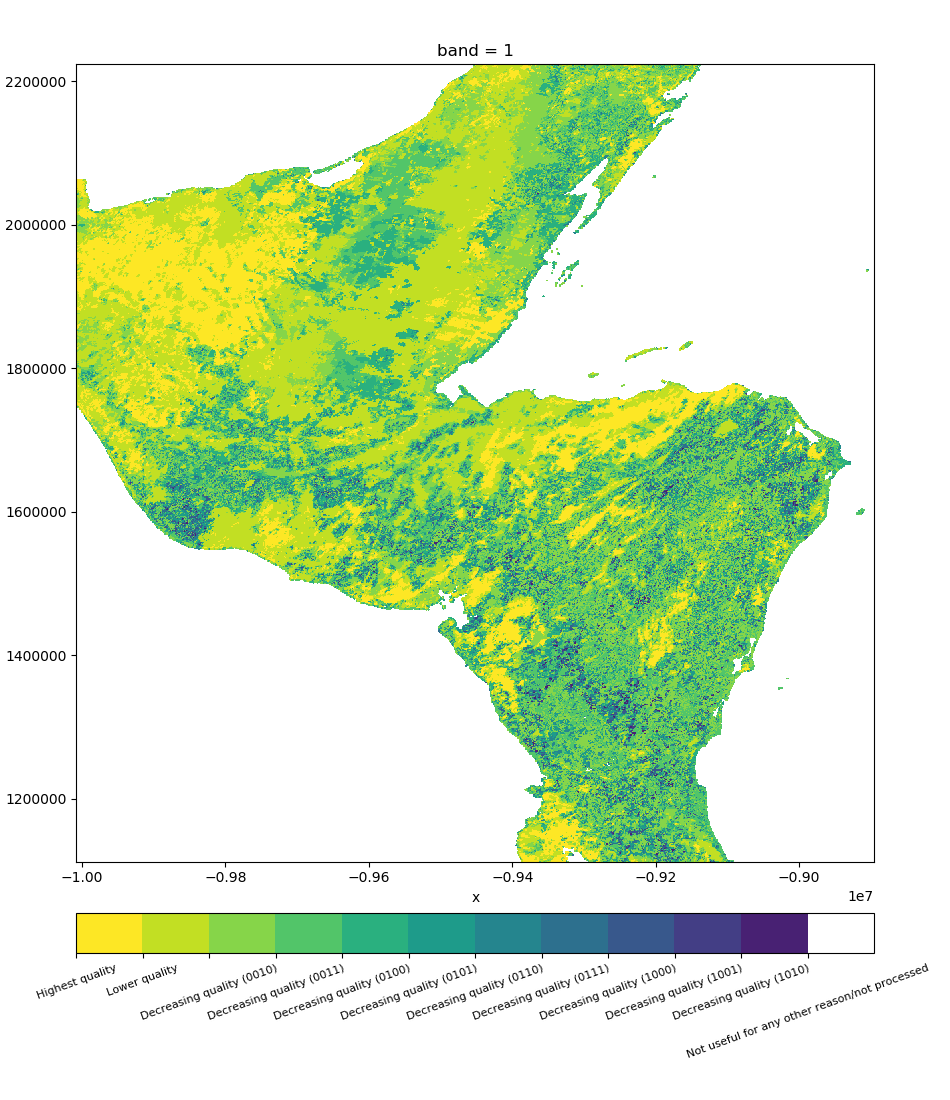

In [4]:
# Land/Water mask
fname = "../../data/MOD13A2.006/MOD13A2.A2018145.h09v07.006.2018162000027.VI_QA_VI_Usefulness.tif"
p = PlotQA()
p.plot(fname)